In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
# Import data
data2 = pd.read_csv("dataset 4/data2.txt", header=None)
data2.columns = ["X_i"]

In [5]:
# Check some stuff
print(data2.shape)
data2.describe()

(1000, 1)


,X_i
count,1000.000000
mean,1.970957
std,3.114474
min,-9.547768
25%,-0.117408
50%,2.051320
75%,4.129579
max,15.213080


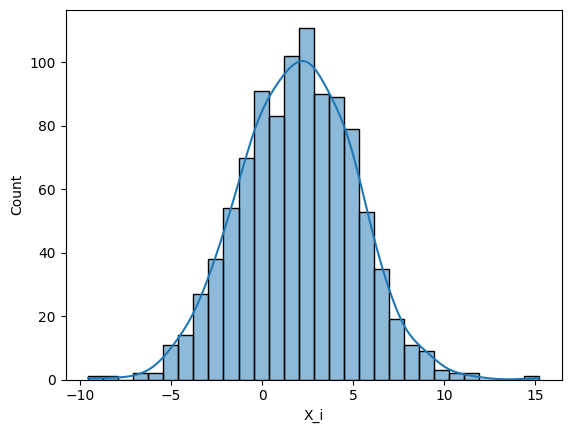

In [6]:
sns.histplot(data2["X_i"], kde = True)
plt.show()

In [7]:
# The distribution is symmetric. This looks like a normal distribution.
# Let's compare the qqplots of various distributions

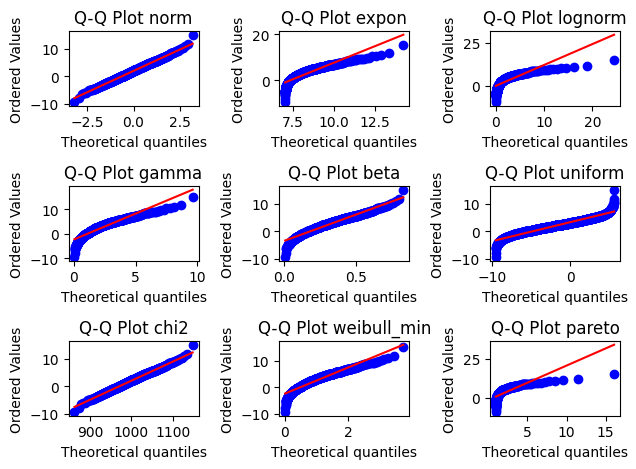

In [8]:
dists = {"norm": (), "expon": (7, ), "lognorm": (1, ), "gamma": (2, ), "beta": (2, 5),
         "uniform":(min(data2["X_i"]), max(data2["X_i"])), "chi2": (999, ), "weibull_min": (1.5, ), "pareto": (2.62, )}
fig, axes = plt.subplots(nrows=3, ncols=3)

axes = axes.flatten()

for i, d in enumerate(dists):
    sparams = dists.get(d, ())
    ax = axes[i]
    stats.probplot(data2["X_i"], dist=d, sparams = sparams, plot = ax)
    
    ax.set_title(label = "Q-Q Plot " + d)
    
plt.tight_layout()
plt.show()

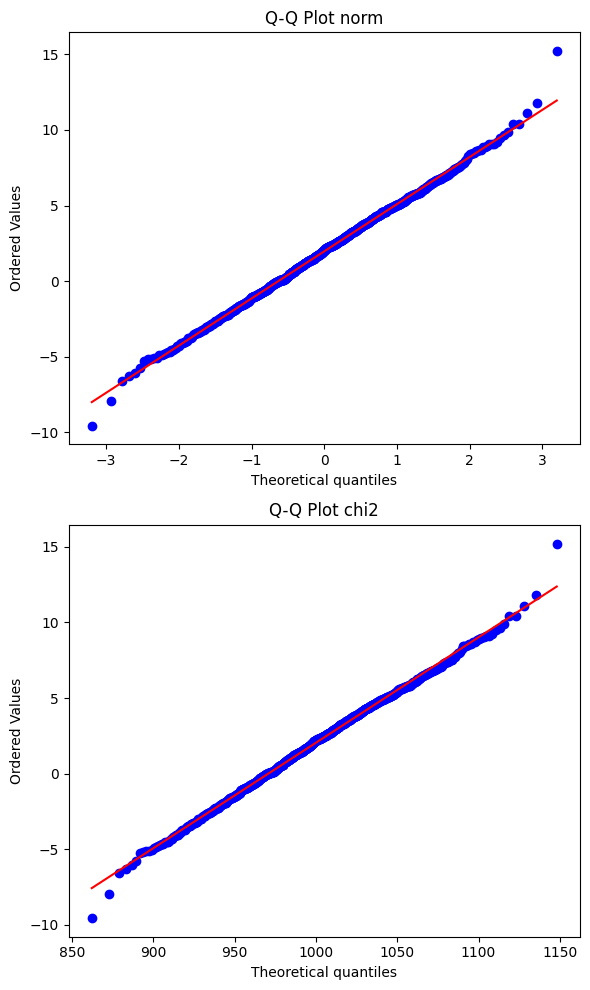

In [9]:
# It seems to be a perfect fit for a normal and chisq distribution.
dists = {"norm": (), "chi2": (999, )}
fig, axes = plt.subplots(nrows=2, figsize=(6, 10))

axes = axes.flatten()

for i, d in enumerate(dists):
    sparams = dists.get(d, ())
    ax = axes[i]
    stats.probplot(data2["X_i"], dist=d, sparams = sparams, plot = ax)
    
    ax.set_title(label = "Q-Q Plot " + d)
    
plt.tight_layout()
plt.show()

In [10]:
# This is expected as chi square distribution approaches a normal
# distribution as sample size increases. n = 1000 is a very big sample size.

In [11]:
from scipy.stats import shapiro, kstest, anderson

# Shapiro-Wilk Test for normality
shapiro_test = shapiro(data2['X_i'])
print('Shapiro-Wilk Test:', shapiro_test)

Shapiro-Wilk Test: ShapiroResult(statistic=0.9986425234304778, pvalue=0.6497414442227523)


In [12]:
# Yes, it seems we were right. The sample does follow a normal distribution.
# Proceed to the parameter estimations.

**For $\mu$, the respective estimators are:**

$$ \mu_{MME} = \frac{\sum_{i=1}^{n} {X_i}}{n} $$
$$ \mu_{MLE} = \frac{\sum_{i=1}^{n} {X_i}}{n} $$

**For $\sigma^2$, the respective estimators are:**

$$ \hat{\sigma}^2_{MLE} = \frac{\sum_{i=1}^{n} {\left( X_i - \overline{x} \right)^2} }{n} $$
$$ \hat{\sigma}^2_{MLE} = \frac{\sum_{i=1}^{n} { X_i^2 } - \frac{\left( \sum_{i=1}^{n} X_i \right)^2}{n}} {n} $$

In [23]:
# Take a random sample

random_sample2 = data2["X_i"].sample(100, replace=False, random_state = 1982)

# Calculate x_bar
summation = sum(random_sample2)
average = summation / 100
# a = np.mean(random_sample2)
print("MME & MLE mu_hat:", average)

# MME and MLE sigma^2 are arithmetically equal.
# Calculate sigma^2
print("MME & MLE sigma^2:", np.std(random_sample2))

MME & MLE mu_hat: 1.8682239409500008
MME & MLE sigma^2: 3.12142780687655


$ \mu_{MME} = \mu_{MLE} \approx 1.868 $

$ \sigma^2_{MME} = \sigma^2_{MLE} \approx 3.121 $

### 2 
#### Relative Efficiency a)
For $\mu$, the theoretical MLE and MME estimators are equal. Hence, they have the same variance. Their relative efficiency is 1.

For $\sigma^2$, the theoretical MLE and MME estimators are arithmetically equal. Thus, they have the same variance. Their relative efficiency is 1.

#### UMVU b)
Through CRLB method, $\overline{x}$ is UMVU for $\hat{\mu}$.

$\hat{\mu} = \overline{x} \approx 1.868$

As sample size increase, $ \hat{\mu} \sim N(1.868, \frac{\sigma_2}{n}) $


Through CRLB method, $\frac{\sum_{i=1}^{n} {\left( X_i - \overline{x} \right)^2} }{n}$ is UMVU for $\hat{\sigma}_2$.
